<a href="https://colab.research.google.com/github/emgoss/PLP6621C/blob/main/Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 3 Assignment: Model Selection

We will use IQTREE to select the best model for our sequence alignment.

IQTREE is a flexible phylogenetic program with pretty good documentation.


If you'd like to learn more about IQTREE, see the tutorials here:
[Beginner’s tutorial](https://iqtree.github.io/doc/Tutorial)


---



**1. Sign up for colab Pro for college students
https://colab.research.google.com/signup. Click "No cost for students and educators"**

**2. Install IQTREE.**

I got help installing and running the IQTREE program from the built in Colab Gemini chatbot. This is a great feature of Colab if you're not comfortable coding or using this interface.

The following text boxes are from Gemini.

In [ ]:
!apt-get install iqtree

The below command will list all files installed by the `iqtree` Debian package. Look for a file named `iqtree` in the output, typically within a `bin` directory (e.g., `/usr/bin/iqtree`). Once we find the correct path, we can use it to run the tool.

In [ ]:
!dpkg -L iqtree

The `which` command should output the full path to the `iqtree` executable if it's in the system's PATH. If it doesn't output anything, it means `iqtree` might not be in a standard location or not fully installed correctly. If a path is returned, we can then use that path in the command.

In [ ]:
!which iqtree

**We will determine the best model for the DNA sequence alignment HPPD.fasta using IQTREE's ModelFinder (Kalyaanamoorthy et al 2017) and then compute a phylogenetic tree.**

The file HPPD.fasta contains sequences from a single locus amplified from isolates of the wheat pathogen *Zymoseptoria tritici* from the Middle East, North America, and Europe (Stukenbrock et al. 2007).


**3. Upload HPPD.fasta to your colab folder using the folder icon on the left side of the screen 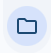and the upload icon Screenshot 2025-11-20 at 11.38.26 AM.png.**

Find the file and copy the path (right click) into the below command replacing /HPPD.fasta to make sure it works.

**4. Run ModelFinder in IQTREE on the HPPD.fasta alignment using the -m TESTONLY command.**

TESTONLY is telling IQTREE to find a model only and not run a phylogenetic analysis, which we'll do later.

In [ ]:
!/usr/bin/iqtree2 -s /HPPD.fasta -st DNA -m TESTONLY --prefix HPPD_test -nt AUTO

In the output, you can see the names of all the sequences and the results of the analysis. See the bottom of the table of models for the best model according to three criteria that take into account the likelihood of the model for these genetic data and the number of parameters in the model.

**5. In the below box, provide the model chosen using Corrected Akaike Information Criterion (AICc) and Bayesian Information Criterion (BIC).**

***Your answer here:***

Corrected Akaike Information Criterion:

Bayesian Information Criterion:

---



See [this page](https://iqtree.github.io/doc/Substitution-Models#dna-models) for basic descriptions of the modelfinder abbreviations. Scroll to the bottom to find the add-on abbreviations.

**6. What is the name of the model that was chosen?**

***Your answer here:***

---

**7. What does this mean in terms of base frequencies and DNA substitution rates? Explain substitution rates in terms of transitions versus transversions and purines versus pyrimidines.**

***Your answer here:***


---

**8. Now try the new ModelFinder using -m TESTONLYNEW.**

In [ ]:
!/usr/bin/iqtree2 -s /HPPD.fasta -st DNA -m TESTONLYNEW --prefix HPPD_testnew -nt AUTO


**9. What is the best model now?**

***Your answer here:***

New model Corrected Akaike Information Criterion:

New model Bayesian Information Criterion:


**10. Now we will infer phylogenetic trees using the selected model.**

You will need to paste your selected model into the code below (remove the brackets []). You can choose which model you want to try.

In [ ]:
!/usr/bin/iqtree2 -s /HPPD.fasta -m [paste model here] -nt AUTO

# e.g. !/usr/bin/iqtree2 -s /HPPD.fasta -m JC -nt AUTO

In [ ]:
!/usr/bin/iqtree2 -s /HPPD.fasta -m K3P+R2 --prefix HPPD_model1 -nt AUTO

**11. What were the estimated DNA substitution rates used to infer the tree? Hint: They are relative to A-C, which is set to 1.0.**

***Your answer here:***

---

**12. Now run the tree again but with a non-optimal model for the tree.**

The GTR model has the most free parameters of the substitution models. We can also add variation among sites across the alignment by adding four categories of  rate variation (G4).

In [ ]:
!/usr/bin/iqtree2 -s /HPPD.fasta -m GTR+G4 --prefix HPPD_GTRGtree -nt AUTO

**13. Take a look at your trees.**

Install biopython and use the phylo package to load and view the tree. This is a quick and dirty ASCII version.

Or download the treefile and import into your favorite treeviewer. One option that doesn't require installing software is https://itol.embl.de/

In [ ]:
!pip install biopython


In [ ]:
from Bio import Phylo
# original tree
tree = Phylo.read("/HPPD.fasta.treefile", "newick")
Phylo.draw_ascii(tree)

**14. The isolates with "S" prefix are from wild relatives of wheat in Iran. All other isolates were collected from wheat in Iran (MG), Israel (Is), US (Or), and Europe (Ch). Based on your tree, what can you say about the "S" isolates?**

***Your answer here:***

---


**15. Compare the tree inferred with the optimal model to the tree using the sub-optimal model. Does the tree change when you use a sub-optimal model?**

***Your answer here:***

---

References cited:

S. Kalyaanamoorthy, B.Q. Minh, T.K.F. Wong, A. von Haeseler, and L.S. Jermiin (2017) ModelFinder: fast model selection for accurate phylogenetic estimates. Nat. Methods, 14:587–589. DOI: 10.1038/nmeth.4285

Stukenbrock et al. (2017) Mol. Biol. Evol. 24(2):398–411. https://doi.org/10.1093/molbev/msl169